In [61]:
# Forest Fire Risk Prediction
# ML classification with weather + fire data

# Libraries
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
# 1. Load Data

df = pd.read_csv('forest_fire_data.csv')

# Quick look at data
print(df.head())
print(df.info())
print(df.describe())

   Temperature   Humidity      Wind       Rain  Fire_Occurrence
0    32.483571  60.990332  7.974465   0.000000                0
1    29.308678  53.869505  9.566444   0.698075                0
2    33.238443  40.894456  7.622740   2.931972                0
3    37.615149  30.295948  9.076115  14.438438                0
4    28.829233  50.473350  4.319156   7.782766                0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature      1000 non-null   float64
 1   Humidity         1000 non-null   float64
 2   Wind             1000 non-null   float64
 3   Rain             1000 non-null   float64
 4   Fire_Occurrence  1000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 39.2 KB
None
       Temperature     Humidity         Wind         Rain  Fire_Occurrence
count  1000.000000  1000.000000  1000.000000  1000.000000 

In [69]:
df.mean()
#Identfy the average for each column


Temperature        30.096660
Humidity           41.124701
Wind               10.017503
Rain                5.375091
Fire_Occurrence     0.120000
dtype: float64

In [ ]:
# 2. Preprocessing

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Features and labels
X = df[['Temperature', 'Humidity', 'Wind', 'Rain']]
y = df['Fire_Occurrence']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

222# Feature scaling (optional for tree-based models, useful for NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# 3. Train Model

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00         1

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



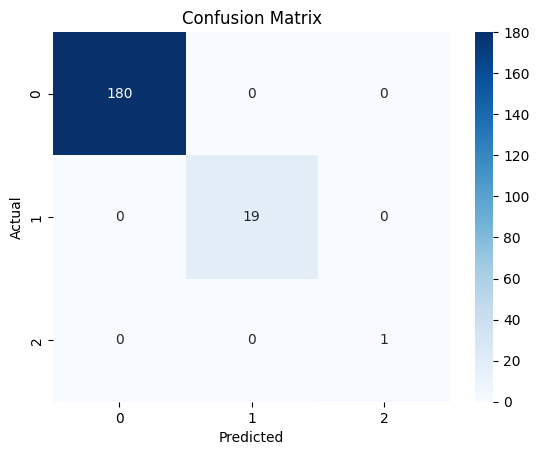

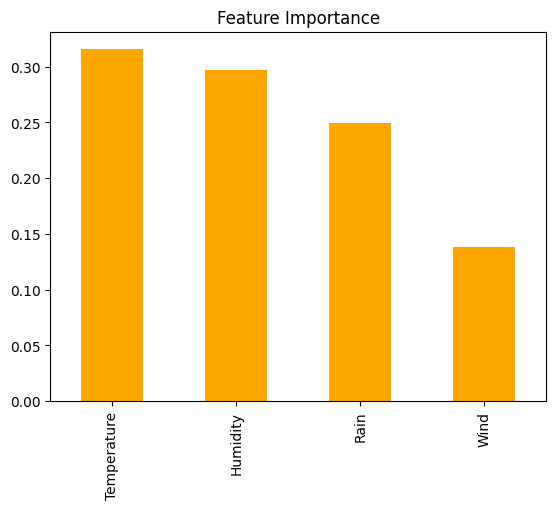

In [ ]:
# 4. Evaluate Model
y_pred = model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title("Feature Importance")
plt.show()


In [ ]:
# 5. Risk Prediction Example

new_data = pd.DataFrame({
    'Temperature': [35],
    'Humidity': [20],
    'Wind': [15],
    'Rain': [0]
})
new_data_scaled = scaler.transform(new_data)
predicted_risk = model.predict(new_data_scaled)
risk_dict = {0: "Low", 1: "Medium", 2: "High"}
print("Predicted Fire Risk:", risk_dict[predicted_risk[0]])

Predicted Fire Risk: High
